# pandasとmatplotlibで株価分析
2016.1.8 みんなのPython勉強会#8 資料

## 自己紹介


* 藤田　拓生

    - CAE (Computer Aided Engineering)エンジニア
    - 某CAEベンダー勤務、受託解析、ソルバーのユーザーサブルーチン作成などを担当
    - Python歴は1年程度。業務で入力データ、出力データのテキストファイルを編集するのにPythonが役に立っている。
      趣味で株式投資をしており、Pythonを活用したいと考えている。
    - ブログ→http://plaza.rakuten.co.jp/takupin/
    - twitter→@pyontaku14
    - facebook→https://www.facebook.com/takuo.fujita.9


## 内容

    - 四季報の業績(売上高、営業利益、経常利益、純利益)の伸び率と株価の伸び率の関係を視覚化する。
    
## 手順

    1. 2014年と2015年の四季報の業績をpandasで四季報オンラインから取得
    2. 業績の伸び率を計算
    3. 2014年3月31日と2015年3月31日の株価調整後終値をpandasでヤフーファイナンスから取得
    4. 株価の伸び率を計算
    5. matplotlibで業績の伸び率を横軸、株価の伸び率を縦軸として散布図を作成
    6. matplotlibで株価の伸び率のヒストグラムを作成
    7. matplotlibでTOPIXのチャート描画


In [1]:
import pandas as pd

## 1. 2014年と2015年の四季報の業績をpandasで四季報オンラインから取得
* 「1301、極洋」の業績を四季報オンラインから取得

In [2]:
gyoseki=pd.read_html("https://shikiho.jp/tk/stock/info/1301")

6番目のデータフレームが目的のデータ

In [3]:
gyoseki[6]

,0,1,2,3,4,5,6
0,【業績】,売上高,営業利益,経常利益,純利益,1株益(円),1株配(円)
1,連11. 3,162731,1588,1783,58,0.6,5
2,連12. 3,181885,1636,1707,423,4.0,5
3,連13. 3,178046,2324,2262,1269,12.1,5
4,連14. 3,202387,2915,2985,2968,28.3,5
5,連15. 3,218350,2460,2107,2433,23.2,5
6,連16. 3予,229000,2600,3000,2200,20.9,5
7,連17. 3予,243000,4300,4200,2500,23.8,5
8,中15. 9,108499,1126,1407,911,8.7,0
9,中16. 9予,115000,1500,1500,1000,9.5,0


2014年と2015年の業績を表示

In [4]:
gyoseki[6].ix[4:5]

,0,1,2,3,4,5,6
4,連14. 3,202387,2915,2985,2968,28.3,5
5,連15. 3,218350,2460,2107,2433,23.2,5


## 2. 業績の伸び率を計算

伸び率=2015年の業績/2014年の業績-1.0<br>
売上高の伸び率→uri, 営業利益の伸び率→eiri<br>
経常利益の伸び率→keiri, 純利益の伸び率→junri<br>

In [5]:
uri=float(gyoseki[6].ix[5,1])/float(gyoseki[6].ix[4,1])-1.0
eiri=float(gyoseki[6].ix[5,2])/float(gyoseki[6].ix[4,2])-1.0
keiri=float(gyoseki[6].ix[5,3])/float(gyoseki[6].ix[4,3])-1.0
junri=float(gyoseki[6].ix[5,4])/float(gyoseki[6].ix[4,4])-1.0

全銘柄について業績の伸び率を計算 (以下を実行すると終了まで3時間くらいかかる)

In [ ]:
# -*- coding: utf-8 -*-
"""
shikihou_gyoseki_150331.py
四季報の売上高、営業利益、経常利益、純利益取得の伸び率取得
"""
import pandas as pd
import time
sta=time.time()

fi=open("meigara.csv","r") #銘柄コードリスト
fo=open("150331_shikihou_gyoseki_syusei.csv","w") #業績の伸び率データ

for code in fi:
    code=code.rstrip()
    print code
    try:
        gyoseki=pd.read_html("https://shikiho.jp/tk/stock/info/"+str(code),header=None)
        print code
        li=list(gyoseki[6].ix[:,0])
        for i in li:
            if "14" in i:
                i1=li.index(i)
                uri=float(gyoseki[6].ix[i1+1,1])/float(gyoseki[6].ix[i1,1])-1.0
                eiri=float(gyoseki[6].ix[i1+1,2])/float(gyoseki[6].ix[i1,2])-1.0
                keiri=float(gyoseki[6].ix[i1+1,3])/float(gyoseki[6].ix[i1,3])-1.0
                junri=float(gyoseki[6].ix[i1+1,4])/float(gyoseki[6].ix[i1,4])-1.0
                break
        print >>fo, code,",",uri,",",eiri,",",keiri,",",junri
    except:
        print "exception occured"
fo.close()
fin=time.time()
print "elapsed time:"+str(fin-sta)+"sec"

In [ ]:
# -*- coding: utf-8 -*-
"""
meigara_list.py
銘柄リストを作成
"""
import pandas as pd
import time
sta=time.time()
fo=open("meigara.csv","w")
for n in range(1,10):
    meigara=pd.read_html("http://kabuka.biz/riron/category/code"+str(n)+"000.htm")
    for i in meigara:
        for j in range(1,len(i)):
            print >>fo, i.ix[j,0][1:5]
fin=time.time()
print "elapsed time:"+str(fin-sta)+"sec"
fo.close()

## 3. 2014年3月31日と2015年3月31日の株価調整後終値をpandasでヤフーファイナンスから取得

「1301、極洋」の株価を取得

In [6]:
kabuka1=pd.read_html("http://info.finance.yahoo.co.jp/history/?code=1301.T&sy=2014&sm=3&sd=31&ey=2014&em=3&ed=31&tm=d")
kabuka1[1]

,0,1,2,3,4,5,6
0,日付,始値,高値,安値,終値,出来高,調整後終値*
1,2014年3月31日,263,264,261,262,255000,262


In [7]:
kabuka2=pd.read_html("http://info.finance.yahoo.co.jp/history/?code=1301.T&sy=2015&sm=3&sd=31&ey=2015&em=3&ed=31&tm=d")
kabuka2[1]

,0,1,2,3,4,5,6
0,日付,始値,高値,安値,終値,出来高,調整後終値*
1,2015年3月31日,288,290,282,284,889000,284


## 4. 株価の伸び率を計算

In [8]:
kabunobi=float(kabuka2[1].ix[1,1])/float(kabuka1[1].ix[1,1])-1.0

全銘柄について株価の伸び率を計算 (以下を実行すると終了まで1時間くらいかかる)

In [ ]:
# -*- coding: utf-8 -*-
"""
kabuka_stretch_ratio_150331.py
株価取得
"""
import pandas as pd
import time
sta=time.time()

y1=2014
m1=3
d1=31
y2=2015
m2=3
d2=31

fi=open("meigara.csv","r") #銘柄コードリスト
fo=open("150331_kabunobi.csv","w") #株価伸び率データ

def get_kabuka(code,yy,mm,dd):
    url="http://info.finance.yahoo.co.jp/history/?code=" + str(code) \
       +".T&sy="+str(yy)+"&sm="+str(mm)+"&sd="+str(dd) \
       +  "&ey="+str(yy)+"&em="+str(mm)+"&ed="+str(dd)+"&tm=d"
    try:
        kabuka = pd.read_html(url)
        kabuka1=kabuka[1].ix[1,6] #調整後終値
    except:
        print "exception occured"+",",str(yy)+"/"+str(mm)+"/"+str(dd)
        kabuka1="0"
    return kabuka1

for code in fi:
    code=code.rstrip()
    print code
    if get_kabuka(code,y1,m1,d1)!="0" and get_kabuka(code,y2,m2,d2)!="0":
        print >>fo,code,",",str(y1)+"/"+str(m1)+"/"+str(d1), \
                        ",",get_kabuka(code,y1,m1,d1), \
                        ",",str(y2)+"/"+str(m2)+"/"+str(d2), \
                        ",",get_kabuka(code,y2,m2,d2), \
                        ",",float(get_kabuka(code,y2,m2,d2)) \
                           /float(get_kabuka(code,y1,m1,d1))-1.0
fi.close()
fo.close()
fin=time.time()
print "elapsed time:"+str(fin-sta)+"sec"

In [5]:
#インラインにグラフ表示
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 5. matplotlibで業績の伸び率を横軸、株価の伸び率を縦軸として散布図を作成

elapsed time:1.59700012207sec


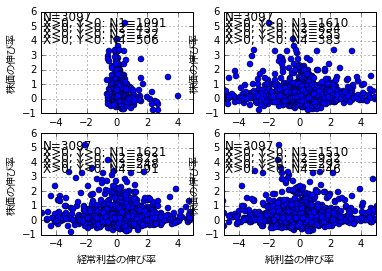

In [4]:
# -*- coding: utf-8 -*-
"""
shikihiou_gyoseki_plot_150331.py
四季報の業績予想の修正率と株価の伸び率の関係
"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
import time
sta=time.time()

prop = matplotlib.font_manager.FontProperties(fname=r'C:\Windows\Fonts\meiryo.ttc') #日本語フォント設定
d1 = pd.read_csv("150331_shikihou_gyoseki_syusei.csv", header=None) #業績の伸び率データ
d2 = pd.read_csv("150331_kabunobi.csv", header=None) #株価伸び率データ

li1=list(d1.ix[:,0])
li2=list(d2.ix[:,0])
li = list(set(li1) & set(li2))
li.sort()

uri=[]
eiri=[]
keiri=[]
junri=[]
kabunobi=[]

n11=0
n12=0
n13=0
n14=0
n21=0
n22=0
n23=0
n24=0
n31=0
n32=0
n33=0
n34=0
n41=0
n42=0
n43=0
n44=0

for code in li:
    i1=li1.index(code)
    i2=li2.index(code)
    uri.append(d1.ix[i1,1])
    eiri.append(d1.ix[i1,2])
    keiri.append(d1.ix[i1,3])
    junri.append(d1.ix[i1,4])
    kabunobi.append(d2.ix[i2,5])
    if float(d1.ix[i1,1])>0.0 and d2.ix[i2,5]>0.0:
        n11+=1
    if float(d1.ix[i1,1])<0.0 and d2.ix[i2,5]>0.0:
        n12+=1
    if float(d1.ix[i1,1])<0.0 and d2.ix[i2,5]<0.0:
        n13+=1
    if float(d1.ix[i1,1])>0.0 and d2.ix[i2,5]<0.0:
        n14+=1
    if float(d1.ix[i1,2])>0.0 and d2.ix[i2,5]>0.0:
        n21+=1
    if float(d1.ix[i1,2])<0.0 and d2.ix[i2,5]>0.0:
        n22+=1
    if float(d1.ix[i1,2])<0.0 and d2.ix[i2,5]<0.0:
        n23+=1
    if float(d1.ix[i1,2])>0.0 and d2.ix[i2,5]<0.0:
        n24+=1
    if float(d1.ix[i1,3])>0.0 and d2.ix[i2,5]>0.0:
        n31+=1
    if float(d1.ix[i1,3])<0.0 and d2.ix[i2,5]>0.0:
        n32+=1
    if float(d1.ix[i1,3])<0.0 and d2.ix[i2,5]<0.0:
        n33+=1
    if float(d1.ix[i1,3])>0.0 and d2.ix[i2,5]<0.0:
        n34+=1
    if float(d1.ix[i1,4])>0.0 and d2.ix[i2,5]>0.0:
        n41+=1
    if float(d1.ix[i1,4])<0.0 and d2.ix[i2,5]>0.0:
        n42+=1
    if float(d1.ix[i1,4])<0.0 and d2.ix[i2,5]<0.0:
        n43+=1
    if float(d1.ix[i1,4])>0.0 and d2.ix[i2,5]<0.0:
        n44+=1
        
plt.subplot(2,2,1) #2×2のプロット
plt.plot(uri,kabunobi,"o")
plt.xlim(-5,5)
plt.xlabel(u"売上高の伸び率", fontproperties=prop)
plt.ylabel(u"株価の伸び率", fontproperties=prop)
#plt.hlines(0,-100,100)
#plt.vlines(0,-100,100)
plt.figtext(0.13,0.87,'N='+str(len(li)),size=12)
plt.figtext(0.13,0.85,'X>0, Y>0: N1='+str(n11),size=12)
plt.figtext(0.13,0.83,'X<0, Y>0: N2='+str(n12),size=12)
plt.figtext(0.13,0.81,'X<0, Y<0: N3='+str(n13),size=12)
plt.figtext(0.13,0.79,'X>0, Y<0: N4='+str(n14),size=12)
plt.grid(True)
plt.subplot(2,2,2)
plt.plot(eiri,kabunobi,"o")
plt.xlim(-5,5)
plt.xlabel(u"営業利益の伸び率", fontproperties=prop)
plt.ylabel(u"株価の伸び率", fontproperties=prop)
plt.grid(True)
plt.figtext(0.55,0.87,'N='+str(len(li)),size=12)
plt.figtext(0.55,0.85,'X>0, Y>0: N1='+str(n21),size=12)
plt.figtext(0.55,0.83,'X<0, Y>0: N2='+str(n22),size=12)
plt.figtext(0.55,0.81,'X<0, Y<0: N3='+str(n23),size=12)
plt.figtext(0.55,0.79,'X>0, Y<0: N4='+str(n24),size=12)
plt.subplot(2,2,3)
plt.plot(keiri,kabunobi,"o")
plt.xlim(-5,5)
plt.xlabel(u"経常利益の伸び率", fontproperties=prop)
plt.ylabel(u"株価の伸び率", fontproperties=prop)
plt.grid(True)
plt.figtext(0.13,0.42,'N='+str(len(li)),size=12)
plt.figtext(0.13,0.40,'X>0, Y>0: N1='+str(n31),size=12)
plt.figtext(0.13,0.38,'X<0, Y>0: N2='+str(n32),size=12)
plt.figtext(0.13,0.36,'X<0, Y<0: N3='+str(n33),size=12)
plt.figtext(0.13,0.34,'X>0, Y<0: N4='+str(n34),size=12)
plt.subplot(2,2,4)
plt.plot(junri,kabunobi,"o")
plt.xlim(-5,5)
plt.xlabel(u"純利益の伸び率", fontproperties=prop)
plt.ylabel(u"株価の伸び率", fontproperties=prop)
plt.grid(True)
plt.figtext(0.55,0.42,'N='+str(len(li)),size=12)
plt.figtext(0.55,0.40,'X>0, Y>0: N1='+str(n41),size=12)
plt.figtext(0.55,0.38,'X<0, Y>0: N2='+str(n42),size=12)
plt.figtext(0.55,0.36,'X<0, Y<0: N3='+str(n43),size=12)
plt.figtext(0.55,0.34,'X>0, Y<0: N4='+str(n44),size=12)
fin=time.time()
print "elapsed time:"+str(fin-sta)+"sec"
plt.show()

## 6. matplotlibで株価の伸び率のヒストグラムを作成

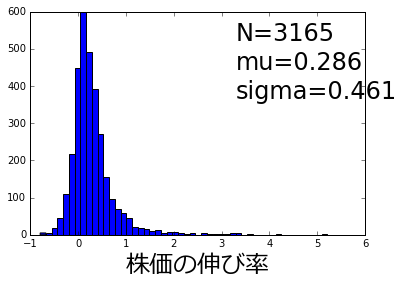

In [6]:
# -*- coding: utf-8 -*-
import numpy
import matplotlib.pyplot as plt
import matplotlib.font_manager

#日本語フォント設定
prop = matplotlib.font_manager.FontProperties(fname=r'C:\Windows\Fonts\meiryo.ttc')

f=open('150331_kabunobi.csv','r')
kabunobi=[]
x=[]
for i in f:
    i=i.rstrip()
    i=i.split(',')
    a=float(i[4])/float(i[2])-1.0
    kabunobi.append(a)
f.close()
x = numpy.array(kabunobi)
plt.xlabel(u"株価の伸び率", fontproperties=prop,size=24)

plt.hist(kabunobi, bins=50)
plt.figtext(0.6,0.8,'N='+str(len(kabunobi)),size=24)
plt.figtext(0.6,0.7,'mu=%.3f' % numpy.mean(x),size=24)
plt.figtext(0.6,0.6,'sigma=%.3f' % numpy.std(x),size=24)
plt.show()

## 7. matplotlibでTOPIXのチャート描画

事前に"pip install jsm"でjsmをインストール。
argvsを生かして、"python jsm_kabuka_get.py 998405 2014 3 31 2015 3 31"として実行することも可能。

C:\Users\takuo\Anaconda\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


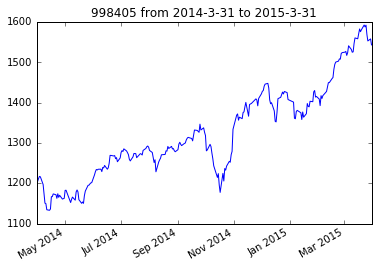

In [12]:
# -*- coding: utf-8 -*-
"""
jsm_kabuka_get.py
株価チャートを描画
"""
import sys
import jsm
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

q=jsm.Quotes()
argvs=sys.argv # コマンドライン引数を格納したリストの取得

# 取得する日の範囲を指定する
#meigara=argvs[1] #銘柄コード
#sy=int(argvs[2]) #start year
#sm=int(argvs[3]) #start month
#sd=int(argvs[4]) #start day
#ey=int(argvs[5]) #end year
#em=int(argvs[6]) #end month
#ed=int(argvs[7]) #end day

meigara= "998405" #銘柄コード
sy=2014 #start year
sm=3 #start month
sd=31 #start day
ey=2015 #end year
em=3 #end month
ed=31 #end day

start = datetime.datetime(sy, sm, sd)
end = datetime.datetime(ey, em, ed)
start1=str(sy)+'-'+str(sm)+'-'+str(sd)
end1=str(ey)+'-'+str(em)+'-'+str(ed)
title=meigara+' from '+start1+' to '+end1
f=open(title +".csv","w")

data=q.get_historical_prices(meigara, jsm.DAILY, start, end)

date=[]
adj_close=[]
for i in data:
    i=str(i)
    i=i.rstrip(">")
    i=i.split(":")
    print >>f, i[1][0:10]+","+i[9]
    tdatetime = datetime.datetime.strptime(i[1]+":00:00", '%Y-%m-%d %H:%M:%S')
    tdate = datetime.date(tdatetime.year, tdatetime.month, tdatetime.day)
    date.append(tdate)
    adj_close.append(i[9])

# データをセット
fig=plt.figure()
plt.title(title)
ax=fig.add_subplot(111)
ax.plot(date, adj_close)
# グラフのフォーマットの設定
fig.autofmt_xdate()
plt.savefig(title)
f.close()

## まとめ


1. pandasでWEB上から四季報の業績データと株価のデータを取得
2. matplotlibで業績の伸び率と株価の伸び率を散布図で視覚化
3. matplotlibで株価の伸び率のヒストグラム作成
4. matplotlibでTOPIXのチャート描画